## HR_Analytics: Job Change of Data Scientists

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [2]:
train = pd.read_csv('aug_train.csv')
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
test = pd.read_csv('aug_test.csv')
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [4]:
train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [5]:
test.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'],
      dtype='object')

Target column is missing in the test dataset. We need to append it from the sample_submission.csv file

In [6]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()

,enrollee_id,target
0,32403,0.5
1,9858,0.5
2,31806,0.5
3,27385,0.5
4,27724,0.5


In [7]:
test['target'] = sample_submission['target']
test.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

I will append test.csv to my dataset in order to preprocess those values as well. We need them later for our predictions.

In [8]:
data = train.append(test, ignore_index=True)
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [9]:
data.shape

(21287, 14)

Exploring the dataset

Looking for null values in the categorical columns

In [10]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    5016
relevent_experience          0
enrolled_university        417
education_level            512
major_discipline          3125
experience                  70
company_size              6560
company_type              6774
last_new_job               463
training_hours               0
target                       0
dtype: int64

In [11]:
# Types of my data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21287 entries, 0 to 21286
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             21287 non-null  int64  
 1   city                    21287 non-null  object 
 2   city_development_index  21287 non-null  float64
 3   gender                  16271 non-null  object 
 4   relevent_experience     21287 non-null  object 
 5   enrolled_university     20870 non-null  object 
 6   education_level         20775 non-null  object 
 7   major_discipline        18162 non-null  object 
 8   experience              21217 non-null  object 
 9   company_size            14727 non-null  object 
 10  company_type            14513 non-null  object 
 11  last_new_job            20824 non-null  object 
 12  training_hours          21287 non-null  int64  
 13  target                  21287 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

There are to many missing values. I'd prefer to drop them only as last resource, because if those missing values don't share the same rows I could be dropping more than 50% of my entire dataset. I will try with some imputations whenever is possible without compromising the accuracy of my future models.

In [12]:
# Getting rid of the 'city_' substring.
data['city'] = data['city'].apply(lambda x: x.lstrip('city_'))

In [13]:
data['city'].value_counts()

103    4828
21     3020
16     1701
114    1491
160     958
       ... 
166       4
129       3
111       3
171       2
140       1
Name: city, Length: 123, dtype: int64

In [14]:
data['city'] = data['city'].apply(lambda x: int(x))

In [15]:
data['gender'].value_counts()

Male      14681
Female     1375
Other       215
Name: gender, dtype: int64

In [16]:
# Here we have only three possibilites in the gender variable. I will have to drop the null values.
data.dropna(subset=['gender'], inplace=True)

In [17]:
data['gender'].isnull().sum()

0

In [18]:
data['enrolled_university'].value_counts()

no_enrollment       12183
Full time course     2870
Part time course      987
Name: enrolled_university, dtype: int64

In [19]:
# For this particular case it should not cause to much harm
# if I create a 'undefined' or 'other' category for the null values.
data['enrolled_university'].fillna('undefined', inplace=True)
data['enrolled_university'].isnull().sum()

0

In [20]:
data['education_level'].value_counts()

Graduate          10009
Masters            3706
High School        1663
Phd                 374
Primary School      235
Name: education_level, dtype: int64

In [21]:
# Same.
data['education_level'].fillna('undefined', inplace=True)
data['education_level'].isnull().sum()

0

In [22]:
data['major_discipline'].value_counts()

STEM               12431
Humanities           622
Other                320
Business Degree      283
Arts                 219
No Major             201
Name: major_discipline, dtype: int64

In [23]:
# Same.
data['major_discipline'].fillna('undefined', inplace=True)
data['major_discipline'].isnull().sum()

0

In [24]:
data['experience'].value_counts()

>20    3126
5      1176
4      1085
3      1055
6       982
7       889
10      883
9       859
2       827
8       675
11      616
15      597
14      507
16      482
12      451
13      370
1       362
<1      322
17      321
19      276
18      257
20      135
Name: experience, dtype: int64

In [25]:
# There are only 70 null values, we can drop them.
data.dropna(subset=['experience'], inplace=True)
data['experience'].isnull().sum()

0

In [26]:
# We don't know what exactly > 20 means, so 21 will serve to our purposes in this case.
data['experience'].replace('>20',"21", inplace=True)

# Zero will do well replacing < 1.
data['experience'].replace('<1',"0", inplace=True)

In [27]:
data['experience'].value_counts()

21    3126
5     1176
4     1085
3     1055
6      982
7      889
10     883
9      859
2      827
8      675
11     616
15     597
14     507
16     482
12     451
13     370
1      362
0      322
17     321
19     276
18     257
20     135
Name: experience, dtype: int64

In [28]:
data['experience'] = data['experience'].apply(lambda x: int(x))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16253 entries, 0 to 21286
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             16253 non-null  int64  
 1   city                    16253 non-null  int64  
 2   city_development_index  16253 non-null  float64
 3   gender                  16253 non-null  object 
 4   relevent_experience     16253 non-null  object 
 5   enrolled_university     16253 non-null  object 
 6   education_level         16253 non-null  object 
 7   major_discipline        16253 non-null  object 
 8   experience              16253 non-null  int64  
 9   company_size            11518 non-null  object 
 10  company_type            11391 non-null  object 
 11  last_new_job            16177 non-null  object 
 12  training_hours          16253 non-null  int64  
 13  target                  16253 non-null  float64
dtypes: float64(2), int64(4), object(8)
mem

In [29]:
data['company_size'].value_counts()

50-99        2633
100-500      2312
10000+       1762
10/49        1279
1000-4999    1162
<10          1127
500-999       750
5000-9999     493
Name: company_size, dtype: int64

In [30]:
data['company_size'].fillna('undefined', inplace=True)
data['company_size'].isnull().sum()

0

In [31]:
data['company_type'].value_counts()

Pvt Ltd                8615
Funded Startup          933
Public Sector           813
Early Stage Startup     483
NGO                     445
Other                   102
Name: company_type, dtype: int64

In [32]:
# We don't what exactly Other means. Our null values could perfectly fit in this category.
data['company_type'].fillna('Other', inplace=True)
data['company_type'].isnull().sum()

0

In [33]:
data['last_new_job'].value_counts()

1        6855
>4       3029
2        2559
never    1860
3         942
4         932
Name: last_new_job, dtype: int64

In [34]:
# Same as we did with our 'experience' column.
data['last_new_job'].replace('>4', "5",inplace=True)
data['last_new_job'].replace('never', "0",inplace=True)
data['last_new_job'].value_counts()

1    6855
5    3029
2    2559
0    1860
3     942
4     932
Name: last_new_job, dtype: int64

In [35]:
data['last_new_job'].isnull().sum()

76

In [36]:
# Only 76 null values to drop.
data.dropna(subset=['last_new_job'], inplace=True)
data['last_new_job'].isnull().sum()

0

In [37]:
data['last_new_job'] = data['last_new_job'].apply(lambda x: int(x))

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16177 entries, 0 to 21286
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             16177 non-null  int64  
 1   city                    16177 non-null  int64  
 2   city_development_index  16177 non-null  float64
 3   gender                  16177 non-null  object 
 4   relevent_experience     16177 non-null  object 
 5   enrolled_university     16177 non-null  object 
 6   education_level         16177 non-null  object 
 7   major_discipline        16177 non-null  object 
 8   experience              16177 non-null  int64  
 9   company_size            16177 non-null  object 
 10  company_type            16177 non-null  object 
 11  last_new_job            16177 non-null  int64  
 12  training_hours          16177 non-null  int64  
 13  target                  16177 non-null  float64
dtypes: float64(2), int64(5), object(7)
mem

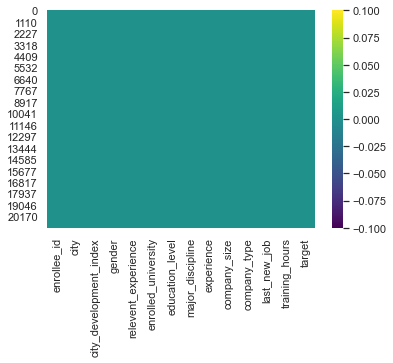

In [39]:
# Scanning our dataset looking for null values.
sns.heatmap(data.isnull(), cmap='viridis');

Now that we took care of the null values and preprocessed all the columns in our data, we might want to make some visuals to gain some stats insights, know better our data, and how our target variable behaves.

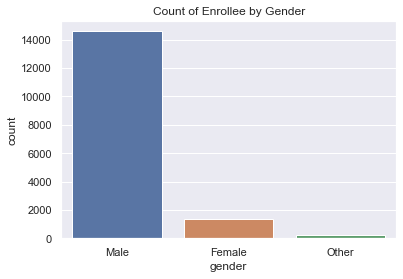

In [40]:
sns.countplot(x='gender', data=data)
plt.title('Count of Enrollee by Gender');

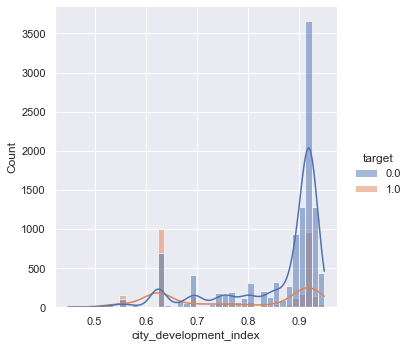

In [41]:
# I need to filter my train data where target values are only 0 and 1.
sns.displot(x='city_development_index', data=data[data['target'] != 0.5], kde=True, hue='target');

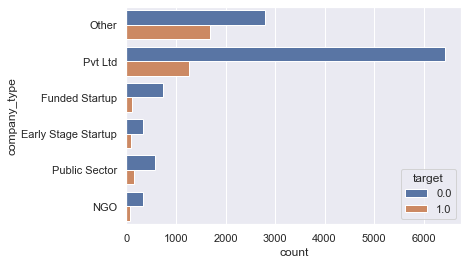

In [42]:
sns.countplot(y='company_type', data=data[data['target'] != 0.5], hue='target');

Seems that more than 35% of people in the Other category from company_type are prone to change for a new job.

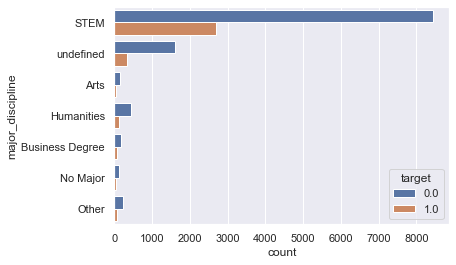

In [43]:
sns.countplot(y='major_discipline', data=data[data['target'] != 0.5], hue='target');

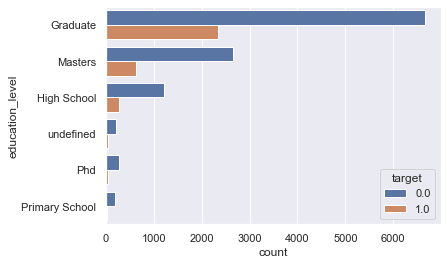

In [44]:
sns.countplot(y='education_level', data=data[data['target'] != 0.5], hue='target');

In [45]:
# Time for some dummies.
data_dummies = pd.get_dummies(data, drop_first=True)
data_dummies.head()

,enrollee_id,city,city_development_index,experience,last_new_job,training_hours,target,gender_Male,gender_Other,relevent_experience_No relevent experience,...,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_size_undefined,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,8949,103,0.920,21,1,36,1.0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,29725,40,0.776,15,5,47,0.0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
4,666,162,0.767,21,4,8,0.0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
6,28806,160,0.920,5,1,24,0.0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
7,402,46,0.762,13,5,18,1.0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


Here I will split my data in test and train again, using as frontier the line where the target values are equal to 0.5. That way, after having pre-processed my data, I can still know the enrollee_ids of the employees that are been tested for prediction.

In [46]:
train_data = data_dummies[data_dummies['target'] != 0.5]
train_data.tail()

,enrollee_id,city,city_development_index,experience,last_new_job,training_hours,target,gender_Male,gender_Other,relevent_experience_No relevent experience,...,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_size_undefined,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
19152,29754,103,0.920,7,1,25,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
19153,7386,173,0.878,14,1,42,1.0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
19154,31398,103,0.920,14,4,52,1.0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
19155,24576,103,0.920,21,4,44,0.0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
19156,5756,65,0.802,0,2,97,0.0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


Let's get sure that our target variable in the train_data has only values of 0 and 1.

In [47]:
train_data['target'].value_counts()

0.0    11205
1.0     3359
Name: target, dtype: int64

In [48]:
test_data = data_dummies[data_dummies['target'] == 0.5]
test_data['target'].value_counts()

0.5    1613
Name: target, dtype: int64

In [49]:
# Defining dependent and independent variables.
X_train = train_data.drop(['target', 'enrollee_id'], axis=1)
y_train = train_data['target']

In [50]:
X_test = test_data.drop(['target','enrollee_id'], axis=1)
# I don't need a y_test here, since those are the values I have to predict.

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [52]:
# Taking a look at our train scaled data.
X_scaled_frame = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_scaled_frame.head()

,city,city_development_index,experience,last_new_job,training_hours,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,...,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_size_undefined,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.472143,0.682103,1.520051,-0.638442,-0.489351,0.328685,-0.114356,-0.581473,-0.252824,0.575659,...,-0.439193,-0.220282,-0.177944,-0.271377,1.552924,-0.247868,-0.168696,1.501508,-0.226884,-1.059148
1,-0.908327,-0.549997,0.633472,1.726025,-0.305668,0.328685,-0.114356,1.719770,-0.252824,0.575659,...,2.276903,-0.220282,-0.177944,-0.271377,-0.643947,-0.247868,-0.168696,-0.665997,-0.226884,0.944155
2,1.764964,-0.627003,1.520051,1.134908,-0.956908,0.328685,-0.114356,-0.581473,-0.252824,0.575659,...,2.276903,-0.220282,-0.177944,-0.271377,-0.643947,4.034401,-0.168696,-0.665997,-0.226884,-1.059148
3,1.721140,0.682103,-0.844159,-0.638442,-0.689733,0.328685,-0.114356,-0.581473,-0.252824,0.575659,...,2.276903,-0.220282,-0.177944,-0.271377,-0.643947,4.034401,-0.168696,-0.665997,-0.226884,-1.059148
4,-0.776853,-0.669784,0.337946,1.726025,-0.789924,0.328685,-0.114356,-0.581473,-0.252824,0.575659,...,-0.439193,-0.220282,-0.177944,3.684912,-0.643947,-0.247868,-0.168696,-0.665997,-0.226884,0.944155


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

Let's use cross_val_score to check which of our classifiers can perform better.

In [54]:
cross_val_score(LogisticRegression(max_iter=400), X_train_scaled, y_train)

array([0.78338483, 0.78132509, 0.77686234, 0.77960865, 0.78537088])

In [55]:
cross_val_score(SVC(), X_train_scaled, y_train)

array([0.80672846, 0.79437007, 0.787161  , 0.78853416, 0.78949176])

In [56]:
cross_val_score(DecisionTreeClassifier(), X_train_scaled, y_train)

array([0.72433917, 0.73120494, 0.7174734 , 0.72227944, 0.73798077])

Seems like our model will use SVC to make the predictions.

In [57]:
clf = SVC()
clf.fit(X_train_scaled, y_train)

SVC()

In [58]:
y_pred = clf.predict(X_test_scaled)

In [59]:
print('Accuracy Score:',str(round(clf.score(X_train_scaled, y_train),2)) + '%')

Accuracy Score: 0.81%


In [60]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

And here is what our HR Department needs. Enrollee ID and a prediction of a possible job change.

In [61]:
result_data = pd.DataFrame()
result_data['enrollee_id'] = test_data['enrollee_id']
result_data['looking_for_job_change'] = y_pred
result_data['prediction'] = pd.cut(result_data['looking_for_job_change'],2,
                                labels=['Not Looking for Job Change', 'Looking for Job Change'])
result_data.head(10)

,enrollee_id,looking_for_job_change,prediction
19158,32403,0.0,Not Looking for Job Change
19159,9858,0.0,Not Looking for Job Change
19160,31806,0.0,Not Looking for Job Change
19161,27385,0.0,Not Looking for Job Change
19162,27724,0.0,Not Looking for Job Change
19163,217,1.0,Looking for Job Change
19165,27302,1.0,Looking for Job Change
19166,12994,0.0,Not Looking for Job Change
19167,16287,0.0,Not Looking for Job Change
19168,10856,0.0,Not Looking for Job Change


In [62]:
result_data['prediction'].value_counts()

Not Looking for Job Change    1352
Looking for Job Change         261
Name: prediction, dtype: int64

 ## END